# Unsupervised machine learning project using dimension reduction and clustering techniques

The purpose of the project is to analyze the heart disease dataset using unsupervised machine learning techniques to gather insights from the data. The aim is to find significant clusters in the data set and finally find essential variables for predicting heart disease. Good classification of the variables might be helpful for preventing from many heart disease.

In [120]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pd.set_option("display.max_columns", 26)

In [121]:
heart = pd.read_csv("heart_attack_prediction_dataset.csv", index_col= ["Patient ID"])
heart.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [122]:
heart.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 8763 entries, BMW7812 to ZWN9666
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart P

In [123]:
# Check if there are any missing values
heart.isna().sum()
# There are no missing values

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [124]:
# We can divide column Blood Pressure onto Systolic and Diastolic
heart["Blood_Pressure_Systolic"] = heart["Blood Pressure"].apply(lambda x: x.split("/")[0]).astype("int")
heart["Blood_Pressure_Diastolic"] = heart["Blood Pressure"].apply(lambda x: x.split("/")[1]).astype("int")
del heart["Blood Pressure"]

In [125]:
#Exploration of the data will be soon

<Axes: xlabel='Age', ylabel='Count'>

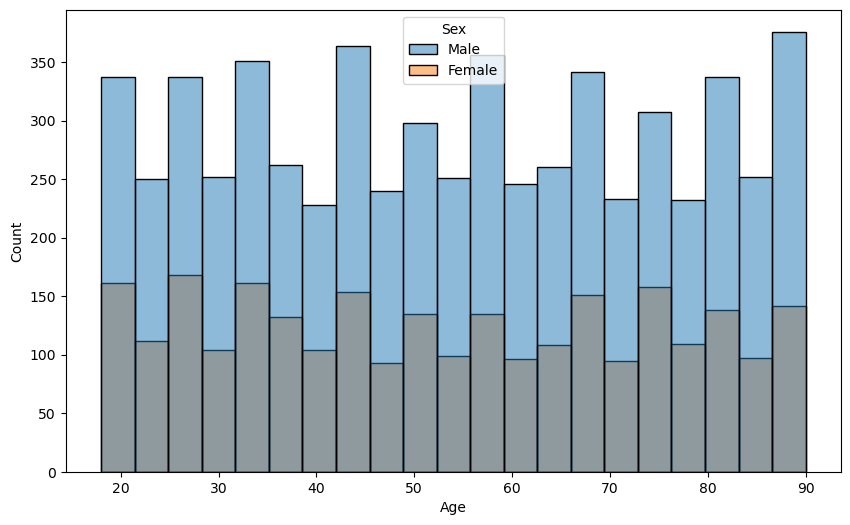

In [126]:
# Distribution of variable age
plt.figure(figsize = (10,6))
sns.histplot(data = heart, x = "Age", hue = "Sex")

<Axes: xlabel='Cholesterol', ylabel='Count'>

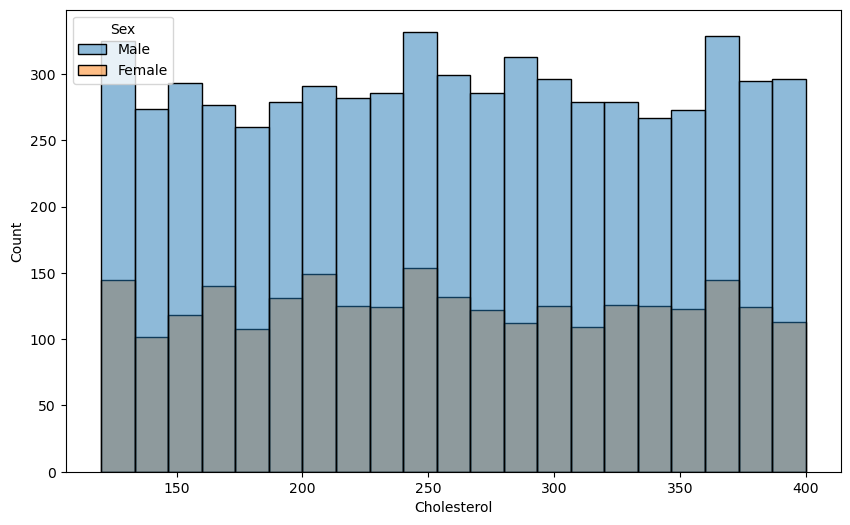

In [127]:
# Distribution of Cholesterol variable
plt.figure(figsize = (10,6))
sns.histplot(data = heart , x = "Cholesterol", hue = "Sex")

In [128]:
# Change variables sex and type of diet to dummy
heart_dummies = pd.get_dummies(data = heart, columns= ["Sex", "Diet"], dtype=int)

In [129]:
# Selecting numeric columns
columns_numeric = list()
for col in heart_dummies.columns:
    if heart_dummies[col].dtype in [int, "int64", float]:
        columns_numeric.append(col)

In [130]:
# Numeric data which can be processed in unsupervised learning processes
heart_numeric = heart_dummies[columns_numeric]

The heatmap with pearson correlation of numeric variables give us information whether the variables are highly correlated. As wee can see only few variables seem to be higly correlated whereas most of the variables are uncorrelated. The information behind the plot is important for further analysis as correlation of the variables cause bias. Since there are still some variables which are highly correlated (i.e. Smoking and Age or Sex and Smoking) there will be necessary to use dimension reduction techniques. Data processed by dimension reduction technique will extract most compact representation of the samples - intrinsic dimension.

<Axes: >

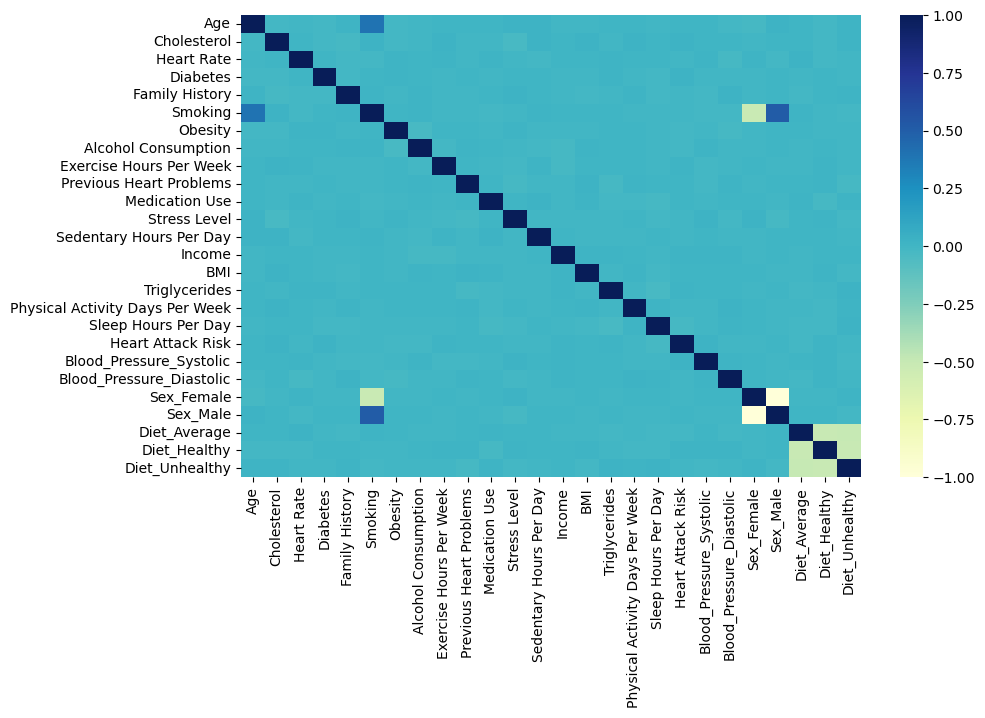

In [131]:
# We plot a heatmap of pearson correlation
plt.figure(figsize = (10,6))
sns.heatmap(heart_numeric.corr(), cmap = "YlGnBu")

In this report the Principal Component Analysis will be used. Before processing the PCA - it is important to standarize the data. To give every feature "a chance" data needs to be scaled so that features have equal variance.

In [132]:
scaler = StandardScaler()
scaler.fit(heart_numeric)
heart_numeric_standardized = scaler.transform(heart_numeric)

## t-SNE

To gather more information before using PCA, we will use t-SNE for visualizing data in two dimensional map. Specifically, it models each high-dimensional object by a two dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. If we choose a point and there are some points in the proximity of the point, the points are similar to each other in the input space (high dimensional space).

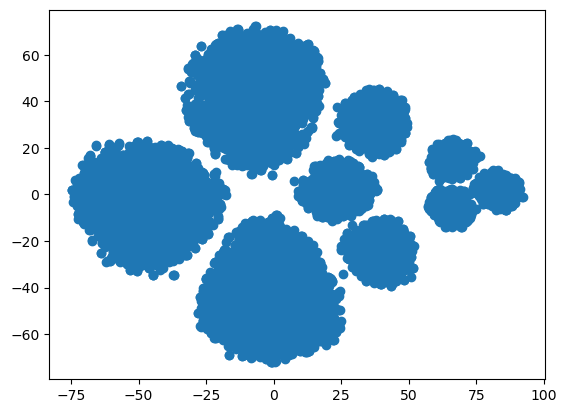

In [133]:
visual_model = TSNE(learning_rate=200)
transformed = visual_model.fit_transform(heart_numeric_standardized)
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys)
plt.show()

Based on the t-SNE visualization mentioned above, we can see that the data forms some significant clusters. The optimal number of clusters will be chosen based on further analysis. From the plot we can see 7 or 9 clusters.

## Principal Component Analysis

PCA identifies intrinsic dimension when samples have any number of features.

In [134]:
# Perform PCA to find omptimal number of components
pca = PCA()
pca.fit(heart_numeric_standardized)

PCA()

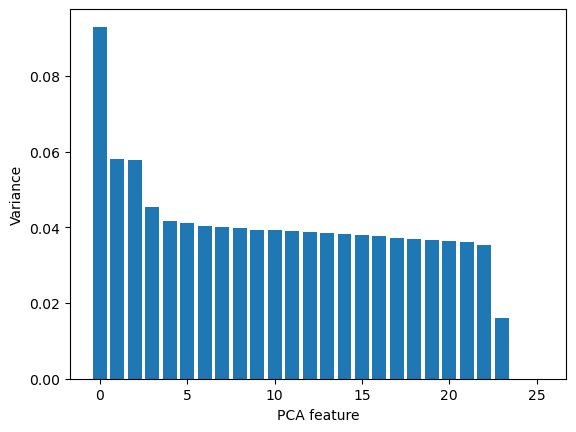

In [135]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel("PCA feature")
plt.ylabel("Variance")
plt.show()

Relying on the bar plot of PCA feature and percentage of variance explained we should go for 22 principal components. We started with 26 numeric variables so the decrease in number of variables is only about 15%. It is important to point out that the more the variables are correlated the better usage of dimension reduction technique is. The result of PCA was expected as when we move onto correlation heat map - only few variables out of 26 were correlated.

In [136]:
# PCA with 22 components
pca22 = PCA(n_components= 22)
pca22.fit(heart_numeric_standardized)
pca_model = pca22.transform(heart_numeric_standardized)
print(f"Number of variables before PCA: {heart_numeric_standardized.shape[1]}\nNumber of variables after PCA: {pca_model.shape[1]}")


Number of variables before PCA: 26
Number of variables after PCA: 22


## KMeans clustering

In the next step we will cluster the set of data obtained by PCA. The case of clustering is to find groups which will be important in case of heart disease prediction. We could then infer which of the variables should people be aware of in case of heart disease.

In KMeans clustering technique we have to specify number of clusters apriori. In this report we will base on cluster inertia to find optimal number of clusters. The lower inertia the better. As a first step we plot inertia for different number of clusters (1-10). Then based on "elbow" method 5 clusters are chosen as an optimal number.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

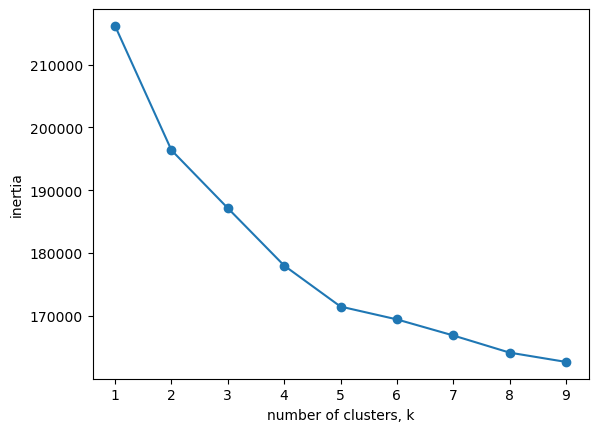

In [137]:
ks = range(1,10)
inertias = list()
for k in ks:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_model)
    inertias.append(kmeans.inertia_)
# plot of inertia for different number of clusters
plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

KMeans clustering with 5 clusters

In [138]:
# KMeans with 5 clusters
kmeans5 = KMeans(n_clusters = 5)
kmeans5.fit(pca_model)
kmeans_model = kmeans5.transform(pca_model)
labels = kmeans5.predict(pca_model)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We can go back to t-SNE plot to see how the KMeans clustering performed.

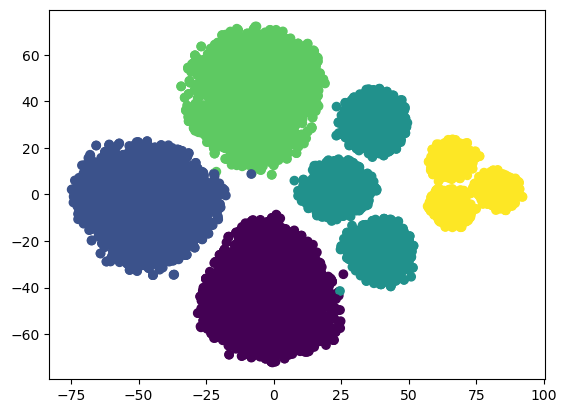

In [139]:
# t-SNE plot with assigned clusters by KMeans
plt.scatter(xs,ys, c = labels)
plt.show()


In [140]:
# Assign clusters to initial dataset
heart["cluster"] = labels
display(heart.head(3))

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,cluster
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88,0
CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93,1
BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99,4


## Clusters analysis

In [141]:
heart.groupby(by = "cluster").size()

cluster
0    2042
1    2001
2    1748
3    2068
4     904
dtype: int64

In [147]:
heart.groupby(by = "cluster").agg(mean_age = ("Age", "mean"), mean_cholesterol = ("Cholesterol", "mean"), mean_income = ("Income", "mean"), 
                                  mean_exercise = ("Exercise Hours Per Week", "mean"), mean_sleep = ("Sleep Hours Per Day", "mean"), 
                                  mean_psych_activity = ("Physical Activity Days Per Week", "mean"))

,mean_age,mean_cholesterol,mean_income,mean_exercise,mean_sleep,mean_psych_activity
cluster,,,,,,
0,54.067091,260.806072,156123.178746,9.969788,7.000000,3.458864
1,54.493253,260.855072,159209.215392,9.940505,7.040480,3.511244
2,65.520595,260.474256,158150.055492,10.105880,7.031465,3.507437
3,53.423598,259.212282,159878.074468,10.051068,7.009671,3.465184
4,28.967920,255.981195,157527.585177,10.016840,7.055310,3.533186


<Axes: xlabel='Diet', ylabel='cluster'>

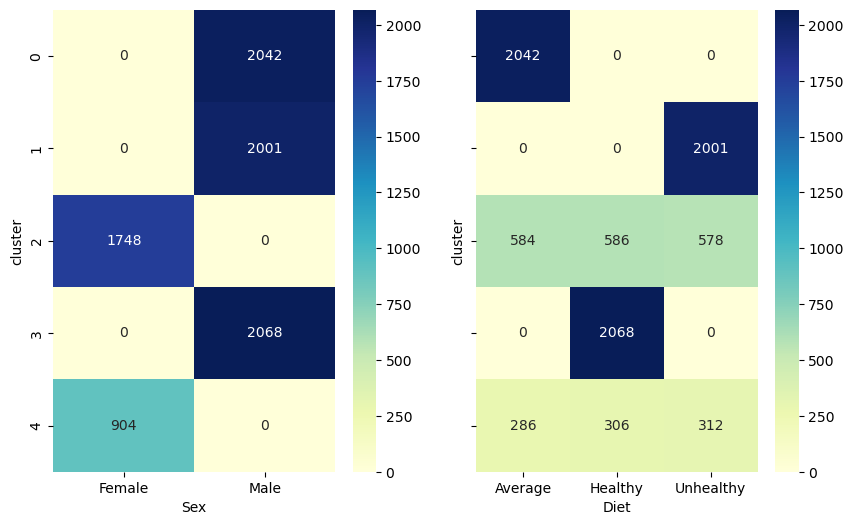

In [177]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)
fig.set_size_inches([10,6])
sns.heatmap(pd.crosstab(heart["cluster"], heart["Sex"]), ax = ax0, cmap = "YlGnBu", annot = True, annot_kws={'size': 10}, fmt=".0f")
sns.heatmap(pd.crosstab(heart["cluster"], heart["Diet"]), ax = ax1, cmap = "YlGnBu", annot = True, annot_kws={'size': 10}, fmt=".0f")